### Avaliacao Final

> Aluna: Andressa Gomes Moreira

> Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


In [1]:
# Importações
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Input, Dense, SimpleRNN, Dropout
from keras.layers import Dense, Embedding, LSTM
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Layer

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.callbacks import TensorBoard
from nltk.tokenize import word_tokenize
from keras import Model

import keras.backend as K
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.metrics import mean_squared_error

#### Análise dos Dados

In [3]:
# Dataset
df = pd.read_table("IMDB Dataset.csv", sep =',')
df.head()  #df[:10]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

#### Limpeza dos Dados

In [5]:
def limpezaDados(text):
    # Remove Tags html
    text_Tags = re.compile('<.*?>')    
    text = text_Tags.sub(r'', text)
    # Remove url
    text_url=re.compile(r"https://\S+|http://\S+")
    text=text_url.sub(r" ", text)
    # Remove pontuações
    text_pont=re.compile(r"[^\w\s]")
    text=text_pont.sub(r" ", text)
    # Remove dígitos
    text_dig=re.compile(r"\d{1,}")
    text=text_dig.sub(r" ", text)
    # Remove caractere único
    text_caract=re.compile(r"\s\w\s")
    text=text_caract.sub(r" ",text)
    # Remove múltiplos espaços
    text_esp=re.compile(r"\s{2,}")                    
    text=text_esp.sub(r" ",text)
    
    return text.lower()  # Texto minúsculo

df['review'] = df['review'].apply(limpezaDados)
df['review'][1]

'a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is terrificly written and performed piece masterful production about one of the great master of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell murals decorating every surface are terribly well done '

#### Tratamento dos Dados

In [6]:
# Define as Stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
# Remover Sotpwords
def remove_stopwords(text):
    text_semStopw=[]
    for word in text.split():
        if word not in stopwords:
            text_semStopw.append(word)
    return " ".join(text_semStopw)

df['review']=df['review'].apply(remove_stopwords)
df['review'][1]

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done'

In [9]:
# reviews - Coluna 'review' = dados
# sentiment - Coluna 'sentiment' = Valores 'positive' e 'negative'
# labels = Labels em valores numéricos

reviews = df['review'].values
sentiment = df['sentiment'].values
encoder = LabelEncoder()
labels = encoder.fit_transform(sentiment)
labels

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
label = to_categorical(labels, num_classes=2).astype(int)

#### Divisão dos Dados

In [11]:
# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(reviews, label, test_size = 0.2)

In [12]:
# Define os Tokens
tokens = Tokenizer(num_words = 3000, oov_token='')
tokens.fit_on_texts(X_train)
word_index = tokens.word_index

X_train = tokens.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train, padding='post', maxlen=200)

X_test = tokens.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test, padding='post', maxlen=200)

In [15]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_test_pad.shape)
print(y_test.shape)

(40000, 200)
(40000, 2)
(10000, 200)
(10000, 2)


#### Criação do modelo

In [16]:
model = Sequential()
model.add(Embedding(3000, 100, input_length=200))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 551,074
Trainable params: 551,074
Non-trainable params: 0
_________________________________________________________________


In [17]:
steps_per_epoch1 = len(X_train_pad)/256

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=500, verbose=1,
                    steps_per_epoch = steps_per_epoch1, batch_size = 256,
                    validation_split=0.2)

Epoch 1/500
156/156 [==============================] - 15s 48ms/step - loss: 0.4230 - accuracy: 0.7932 - val_loss: 0.3299 - val_accuracy: 0.8710
Epoch 2/500
156/156 [==============================] - 7s 44ms/step - loss: 0.2625 - accuracy: 0.8990 - val_loss: 0.3296 - val_accuracy: 0.8622
Epoch 3/500
156/156 [==============================] - 7s 47ms/step - loss: 0.2442 - accuracy: 0.9062 - val_loss: 0.3400 - val_accuracy: 0.8714
Epoch 4/500
156/156 [==============================] - 7s 44ms/step - loss: 0.2145 - accuracy: 0.9188 - val_loss: 0.3679 - val_accuracy: 0.8701
Epoch 5/500
156/156 [==============================] - 7s 44ms/step - loss: 0.1885 - accuracy: 0.9305 - val_loss: 0.3949 - val_accuracy: 0.8634
Epoch 6/500
156/156 [==============================] - 7s 44ms/step - loss: 0.1752 - accuracy: 0.9359 - val_loss: 0.3922 - val_accuracy: 0.8511
Epoch 7/500
156/156 [==============================] - 7s 45ms/step - loss: 0.1589 - accuracy: 0.9427 - val_loss: 0.4458 - val_accuracy

156/156 [==============================] - 1s 9ms/step - loss: 1.8732e-10 - accuracy: 1.0000 - val_loss: 3.9628 - val_accuracy: 0.8380


#### Resultados

In [19]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

predict = model.predict(X_test_pad)
y_pred = np.argmax(predict, axis = 1)
y_true = np.argmax(y_test, axis = 1)

print("Acurácia:", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, average=None))
print("Recall: ", recall_score(y_true, y_pred, average=None))
print("F1 Score: ", f1_score(y_true, y_pred, average=None))

print(classification_report(y_true, y_pred))

313/313 [==============================] - 3s 9ms/step
Acurácia: 0.8412
Precision:  [0.83661692 0.84582915]
Recall:  [0.84570509 0.83674687]
F1 Score:  [0.84113645 0.84126349]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4971
           1       0.85      0.84      0.84      5029

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



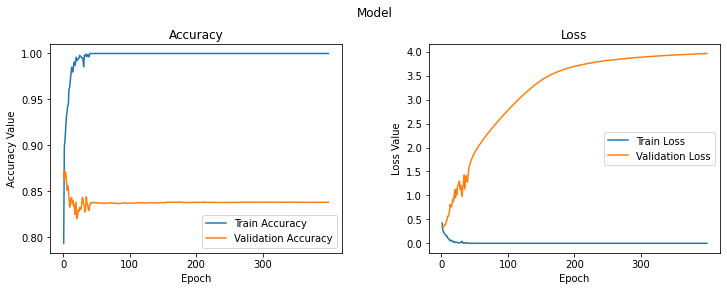

In [20]:
epochs = np.shape(history.history['accuracy'])[0]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 100))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 100))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted Label')]

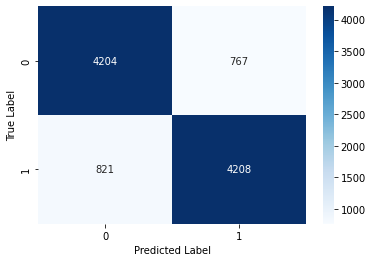

In [21]:
cm=confusion_matrix(y_true, y_pred)
#sns.heatmap(cm,annot=True,fmt='d')
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues').set(ylabel='True Label', xlabel='Predicted Label')
